In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

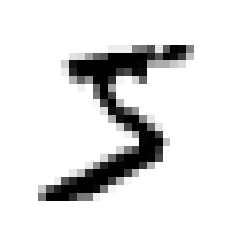

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y[0]

'5'

In [7]:
import numpy as np
y = y.astype(np.uint8)

In [77]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

In [78]:
import scipy
from itertools import chain

def shift(data,direction = 'all'):
    if(direction == 'right'):
        return scipy.ndimage.interpolation.shift(data,[0,1],cval=0)
    elif(direction == 'left'):
        return scipy.ndimage.interpolation.shift(data,[0,-1],cval=0)
    elif(direction == 'up'):
        return scipy.ndimage.interpolation.shift(data,[-1,0],cval=0)
    elif(direction == 'down'):
        return scipy.ndimage.interpolation.shift(data,[1,0],cval=0)
    elif(direction == 'all'):
        return np.array(list((chain(data, shift(data,'left'), shift(data,'right'), shift(data,'up'), shift(data,'down')))))
    else:
        raise Exception("wrong direction try 'left', 'right', 'up' or 'down'")


X_train_expansion = shift(X_train)
X_test_expansion = shift(X_test)
y_train_expansion = np.array(list((chain(y_train,y_train,y_train,y_train,y_train))))
y_test_expansion = np.array(list((chain(y_test,y_test,y_test,y_test,y_test))))

print(X_train_expansion.shape)
print(X_test_expansion.shape)
print(y_train_expansion.shape)
print(y_test_expansion.shape)


(30000, 784)
(320000, 784)
(30000,)
(320000,)


In [90]:
y_train_expansion = y_train_expansion.astype(np.uint8)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf,X_train_expansion,y_train_expansion,cv=3,scoring="accuracy")

array([0.4527, 0.6506, 0.1027])

In [83]:
print(y_train_expansion[5000])

7


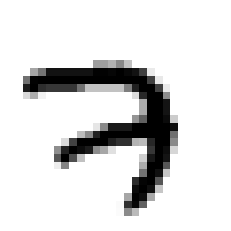

In [84]:
plt.imshow(X_train_expansion[5000].reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

In [88]:
print(type(y_train))

<class 'numpy.ndarray'>
